# Bird or plane?

According to the literature square loss in conjunction with a logistic layer leads to small gradients and thus to slow learning. Cross-entropy loss remedies that. I could not, however, verify that. Thus, it's your turn now!

The idea is to take a more demanding dataset, the [CIFAR10](https://www.cs.toronto.edu/%7Ekriz/cifar.html) dataset.

First, we do a couple of necessary imports.

In [2]:
import tensorflow as tf
from sklearn.utils import shuffle
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

We load the dataset with a convenient in-built method of tensorflow. We put all data in <code>X</code>, all classes in <code>y</code> and then scale so that the data has range $[0,1]$.

In [3]:
data = tf.keras.datasets.cifar10
(x1, y1), (x2, y2) = data.load_data()
X=np.vstack([x1,x2])
y=np.vstack([y1,y2]).reshape(-1,)
X=X/255. # normalise so that all values in [0,1]
X.shape,y.shape

((60000, 32, 32, 3), (60000,))

We restrict to a binary classification problem: is it a bird or an airplane?

In [4]:
X_bin=X[(y==0) | (y==2)]
y_bin=y[(y==0) | (y==2)]/2 # divide by 2, in order to get classes 0,1

We further simplify by turning the colour images into gray scale images. Let's visualise some samples.

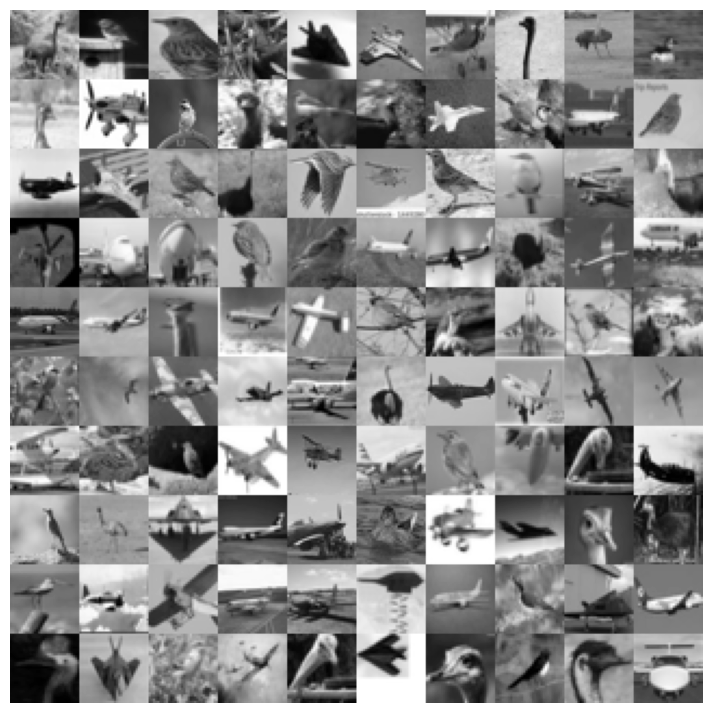

((12000, 32, 32), (12000,))

In [5]:
def to_grayscale(img):
    return 1-(0.299*img[:,:,0]+0.587*img[:,:,1]+0.114*img[:,:,2])
X_bin=np.array([to_grayscale(img) for img in X_bin])

def show_samples(X,N=10):
    rows=[]
    for j in range(N):
        data=[X[i] for i in range(j*N,(j+1)*N)]
        rows.append(np.hstack(data))
    block=np.vstack(rows)

    # now we plot the array
    fig,ax=plt.subplots(figsize=(9,9))
    ax.imshow(block, cmap = "binary")
    ax.axis("off")
    plt.show()
show_samples(X_bin)
# let's see whether data is in the form we think it should be in
X_bin.shape,y_bin.shape

Next, let's write a method that draws a training and a test set from the data.

In [6]:
train_size=7000
def get_datasets():
    XX,yy=shuffle(X_bin,y_bin)
    x_bin_train,x_bin_test=XX[:train_size],XX[train_size:]
    y_bin_train,y_bin_test=yy[:train_size],yy[train_size:]
    return x_bin_train,y_bin_train,x_bin_test,y_bin_test

We also write a method to set up a very simple neural network. (Not the most appropriate for this task!)

In [7]:
def get_model():
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(32, 32)),
      tf.keras.layers.Dense(80, activation='relu'),
      tf.keras.layers.Dense(40, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

Now it's up to you!

### Task: Compare square loss and cross-entropy loss
* Train a neural network as defined in <code>get_model</code> with square loss, and finetune the learning rate. That is, try out different learning rates (perhaps in a half-way systematic manner) and pick the best one. (How do you measure what's best?)
* Do the same for a neural network with cross-entropy loss.
* With the finetuned learning rate, train a square loss network and a cross-entropy network for a number of epochs that seems appropriate.
* Repeat the previous step five (or ten, or twenty, depending on how much time you're willing to invest) times.
* Take the median of training and test accuracy and plot the result. (Don't bother with the gradients.)

You may find it useful to borrow code from [loss_compare.ipynb](https://colab.research.google.com/github/henningbruhn/math_of_ml_course/blob/main/neural_networks/loss_compare.ipynb)

In [8]:
[x_bin_train,y_bin_train,x_bin_test,y_bin_test] = get_datasets()

## train model with square loss and varying but constant learning rates 

In [9]:
# train with square loss and 
lr = 0.5
# big number to allow for easy first comparison with dummy value
# that way we dont need some annoying index magic
best_loss = 10**9
best_rate = 1
while True:
    model1 = get_model()
    print(f"training with learing rate {lr}")
    my_SGD=tf.keras.optimizers.SGD(learning_rate=lr)
    loss_fn = tf.keras.losses.MeanSquaredError()
    model1.compile(loss = loss_fn, metrics = ['accuracy'], optimizer=my_SGD)
    history = model1.fit(x_bin_train, y_bin_train, epochs = 5) #fix same number of epochs in both models
    loss = history.history['loss']
    mean_loss = sum(loss)/len(loss) # mean loss over all epochs
    if mean_loss < best_loss:
        best_loss = mean_loss
        best_rate = lr
        # reduce learning rate by 10% until mean loss increases
        lr = 0.9*lr
    else:
        print(best_rate)
        best_lr_square_loss = best_rate
        break


training with learing rate 0.5
Epoch 1/5


219/219 [==============================] - 1s 2ms/step - loss: 0.2359 - accuracy: 0.6054
Epoch 2/5
219/219 [==============================] - 1s 2ms/step - loss: 0.2237 - accuracy: 0.6361
Epoch 3/5
219/219 [==============================] - 1s 2ms/step - loss: 0.2173 - accuracy: 0.6563
Epoch 4/5
219/219 [==============================] - 1s 2ms/step - loss: 0.2126 - accuracy: 0.6680
Epoch 5/5
219/219 [==============================] - 0s 2ms/step - loss: 0.2092 - accuracy: 0.6780
training with learing rate 0.45
Epoch 1/5
219/219 [==============================] - 1s 4ms/step - loss: 0.2376 - accuracy: 0.5886
Epoch 2/5
219/219 [==============================] - 1s 4ms/step - loss: 0.2227 - accuracy: 0.6403
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 0.2157 - accuracy: 0.6574
Epoch 4/5
219/219 [==============================] - 1s 3ms/step - loss: 0.2123 - accuracy: 0.6677
Epoch 5/5
219/219 [========================

## train model with cross entropy loss and varying but constant learning rates 

In [10]:
# train with cross entropy loss and 
lr = 0.5
# big number to allow for easy first comparison with dummy value
# that way we dont need some annoying index magic
best_loss = 10**9
best_rate = 1
while True:
    model1 = get_model()
    print(f"training with learing rate {lr}")
    my_SGD=tf.keras.optimizers.SGD(learning_rate=lr)
    loss_fn = tf.keras.losses.BinaryCrossentropy()
    model1.compile(loss = loss_fn, metrics = ['accuracy'], optimizer=my_SGD)
    history = model1.fit(x_bin_train, y_bin_train, epochs = 5) #fix same number of epochs in both models
    loss = history.history['loss']
    mean_loss = sum(loss)/len(loss) # mean loss over all epochs
    if mean_loss < best_loss:
        best_loss = mean_loss
        best_rate = lr
        # reduce learning rate by 50% until mean loss increases, see explanation below
        lr = 0.5*lr
    else:
        print(best_rate)
        best_lr_ce_loss = best_rate
        break

training with learing rate 0.5
Epoch 1/5
219/219 [==============================] - 1s 2ms/step - loss: 12.9032 - accuracy: 0.4890
Epoch 2/5
219/219 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4961
Epoch 3/5
219/219 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5027
Epoch 4/5
219/219 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5153
Epoch 5/5
219/219 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4933
training with learing rate 0.25
Epoch 1/5
219/219 [==============================] - 1s 2ms/step - loss: 0.6703 - accuracy: 0.5913
Epoch 2/5
219/219 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.6340
Epoch 3/5
219/219 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.6406
Epoch 4/5
219/219 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.6631
Epoch 5/5
219/219 [==========================

I noticed that the loss would sometimes produce very large outliers with cross entropy loss (think values >1000) which didn't happen with square loss. Reducing the learning rate very quickly seems to solves this problem since the values get small faster. 

## train square loss NN with learing rate in variable best_lr_square_loss

In [38]:

train_acc_square = []
test_acc_square = []
train_acc_x = []
test_acc_x = []

for i in range(10):
    model1 = get_model()
    my_SGD=tf.keras.optimizers.SGD(learning_rate=best_lr_square_loss)
    loss_fn = tf.keras.losses.MeanSquaredError()
    model1.compile(loss = loss_fn, metrics = ['accuracy'], optimizer=my_SGD)
    history = model1.fit(x_bin_train, y_bin_train, epochs = 5, validation_data = (x_bin_test,y_bin_test)) # use test set as validation to get accuracy
    train_acc_square.append(history.history['accuracy'])
    test_acc_square.append(history.history['val_accuracy'])

    model2 = get_model()
    my_SGD=tf.keras.optimizers.SGD(learning_rate=best_lr_square_loss)
    loss_fn = tf.keras.losses.BinaryCrossentropy()
    model2.compile(loss = loss_fn, metrics = ['accuracy'], optimizer=my_SGD)
    history = model2.fit(x_bin_train, y_bin_train, epochs = 5, validation_data = (x_bin_test,y_bin_test)) # use test set as validation to get accuracy
    train_acc_x.append(history.history['accuracy'])
    test_acc_x.append(history.history['val_accuracy'])

Epoch 1/5
219/219 [==============================] - 2s 4ms/step - loss: 0.2356 - accuracy: 0.6056 - val_loss: 0.2212 - val_accuracy: 0.6292
Epoch 2/5
219/219 [==============================] - 1s 4ms/step - loss: 0.2202 - accuracy: 0.6454 - val_loss: 0.2261 - val_accuracy: 0.6076
Epoch 3/5
219/219 [==============================] - 1s 4ms/step - loss: 0.2127 - accuracy: 0.6684 - val_loss: 0.2367 - val_accuracy: 0.6388
Epoch 4/5
219/219 [==============================] - 1s 4ms/step - loss: 0.2088 - accuracy: 0.6784 - val_loss: 0.2182 - val_accuracy: 0.6428
Epoch 5/5
219/219 [==============================] - 1s 3ms/step - loss: 0.2051 - accuracy: 0.6857 - val_loss: 0.2030 - val_accuracy: 0.6846
Epoch 1/5
219/219 [==============================] - 1s 4ms/step - loss: 0.6955 - accuracy: 0.5439 - val_loss: 0.6937 - val_accuracy: 0.4958
Epoch 2/5
219/219 [==============================] - 1s 4ms/step - loss: 0.6776 - accuracy: 0.5604 - val_loss: 0.6411 - val_accuracy: 0.6292
Epoch 3/5
219

In [39]:
test_square_median = np.median(np.array(test_acc_square), axis=0)
train_square_median = np.median(np.array(train_acc_square), axis=0)

test_x_median = np.median(np.array(test_acc_x), axis=0)
train_x_median = np.median(np.array(train_acc_x), axis=0)

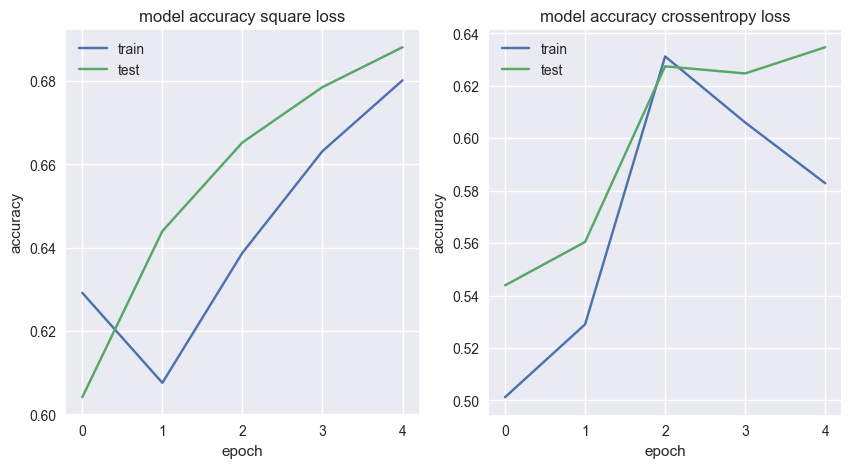

In [43]:
_,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].plot(test_square_median)
axs[0].plot(train_square_median)
axs[0].set_title('model accuracy square loss')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='upper left')

axs[1].plot(test_x_median)
axs[1].plot(train_x_median)
axs[1].set_title('model accuracy crossentropy loss')
axs[1].set_ylabel('accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='upper left')
